* Data Set

In [1]:
import numpy as np

signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

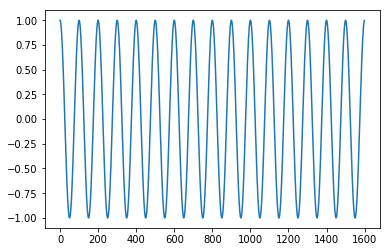

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

In [3]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

### 다층퍼셉트론 신경망 모델

Using TensorFlow backend.


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 1s 2ms/step - loss: 0.1054 - val_loss: 0.0321
Epoch 2/200
760/760 [==============================] - 0s 94us/step - loss: 0.0523 - val_loss: 0.0235
Epoch 3/200
760/760 [==============================] - 0s 88us/step - loss: 0.0431 - val_loss: 0.0188
Epoch 4/200
760/760 [==============================] - 0s 81us/step - loss: 0.0364 - val_loss: 0.0238
Epoch 5/200
760/760 [==============================] - 0s 87us/step - loss: 0.0321 - val_loss: 0.0202
Epoch 6/200
760/760 [==============================] - 0s 88us/step - loss: 0.0306 - val_loss: 0.0250
Epoch 7/200
760/760 [==============================] - 0s 80us/step - loss: 0.0276 - val_loss: 0.0244
Epoch 8/200
760/760 [==============================] - 0s 83us/step - loss: 0.0285 - val_loss: 0.0248
Epoch 9/200
760/760 [==============================] - 0s 98us/step - loss: 0.0280 - val_loss: 0.0240
Epoch 10/200
760/760 [===============

760/760 [==============================] - 0s 83us/step - loss: 0.0129 - val_loss: 0.0216
Epoch 81/200
760/760 [==============================] - 0s 81us/step - loss: 0.0111 - val_loss: 0.0201
Epoch 82/200
760/760 [==============================] - 0s 85us/step - loss: 0.0109 - val_loss: 0.0220
Epoch 83/200
760/760 [==============================] - 0s 81us/step - loss: 0.0117 - val_loss: 0.0200
Epoch 84/200
760/760 [==============================] - 0s 85us/step - loss: 0.0126 - val_loss: 0.0202
Epoch 85/200
760/760 [==============================] - 0s 84us/step - loss: 0.0122 - val_loss: 0.0193
Epoch 86/200
760/760 [==============================] - 0s 81us/step - loss: 0.0122 - val_loss: 0.0194
Epoch 87/200
760/760 [==============================] - 0s 81us/step - loss: 0.0120 - val_loss: 0.0218
Epoch 88/200
760/760 [==============================] - 0s 84us/step - loss: 0.0113 - val_loss: 0.0176
Epoch 89/200
760/760 [==============================] - 0s 77us/step - loss: 0.0118 - 

760/760 [==============================] - 0s 83us/step - loss: 0.0115 - val_loss: 0.0172
Epoch 160/200
760/760 [==============================] - 0s 83us/step - loss: 0.0102 - val_loss: 0.0166
Epoch 161/200
760/760 [==============================] - 0s 79us/step - loss: 0.0103 - val_loss: 0.0187
Epoch 162/200
760/760 [==============================] - 0s 83us/step - loss: 0.0101 - val_loss: 0.0174
Epoch 163/200
760/760 [==============================] - 0s 80us/step - loss: 0.0097 - val_loss: 0.0176
Epoch 164/200
760/760 [==============================] - 0s 84us/step - loss: 0.0102 - val_loss: 0.0161
Epoch 165/200
760/760 [==============================] - 0s 84us/step - loss: 0.0094 - val_loss: 0.0152
Epoch 166/200
760/760 [==============================] - 0s 86us/step - loss: 0.0102 - val_loss: 0.0164
Epoch 167/200
760/760 [==============================] - 0s 83us/step - loss: 0.0101 - val_loss: 0.0152
Epoch 168/200
760/760 [==============================] - 0s 83us/step - loss: 

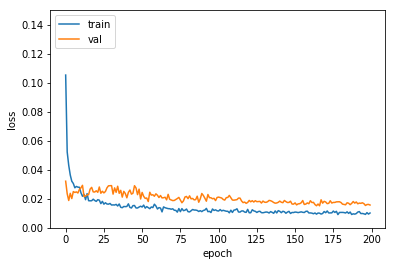

Train Score:  0.015948194667304818
Validataion Score:  0.01570680798548791
Test Score:  0.01570680798548791


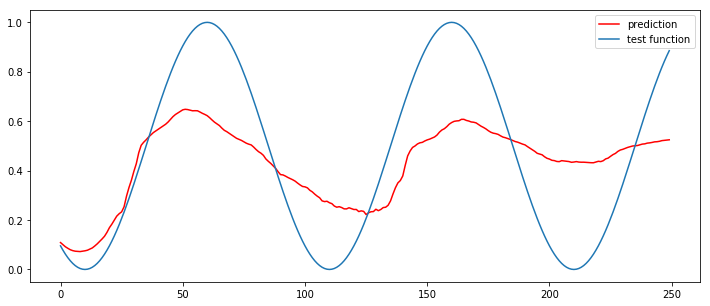

In [5]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adagrad')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
          
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

### 순환신경망 모델

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 2s 2ms/step - loss: 0.1739 - val_loss: 0.0287
Epoch 2/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0360 - val_loss: 0.0205
Epoch 3/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0242 - val_loss: 0.0115
Epoch 4/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0174 - val_loss: 0.0024
Epoch 5/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0123 - val_loss: 0.0028
Epoch 6/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 8.6250e-04
Epoch 7/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0093 - val_loss: 7.4922e-04
Epoch 8/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0090 - val_loss: 0.0014
Epoch 9/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0089 - val_loss: 5.0996e-04
Epoch 10/200
760/760 [===========

760/760 [==============================] - 1s 1ms/step - loss: 0.0031 - val_loss: 4.0159e-05
Epoch 79/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0027 - val_loss: 2.6848e-05
Epoch 80/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0028 - val_loss: 3.0088e-04
Epoch 81/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0029 - val_loss: 2.1289e-05
Epoch 82/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0027 - val_loss: 5.7541e-05
Epoch 83/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0029 - val_loss: 1.6114e-04
Epoch 84/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0027 - val_loss: 9.1470e-05
Epoch 85/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 2.8005e-05
Epoch 86/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0034 - val_loss: 1.5638e-04
Epoch 87/200
760/760 [==============================] - 1s 

Epoch 155/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 5.5245e-05
Epoch 156/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 6.0345e-04
Epoch 157/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0019 - val_loss: 1.8267e-04
Epoch 158/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 2.3307e-04
Epoch 159/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 1.4536e-04
Epoch 160/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 2.3384e-05
Epoch 161/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 6.1116e-05
Epoch 162/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 2.2800e-05
Epoch 163/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0021 - val_loss: 1.7394e-04
Epoch 164/200
760/760 [==============

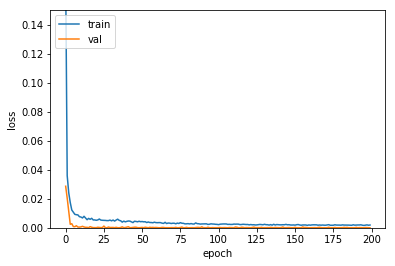

Train Score:  2.1687028454739207e-05
Validataion Score:  2.2083623156908692e-05
Test Score:  2.2083623156908692e-05


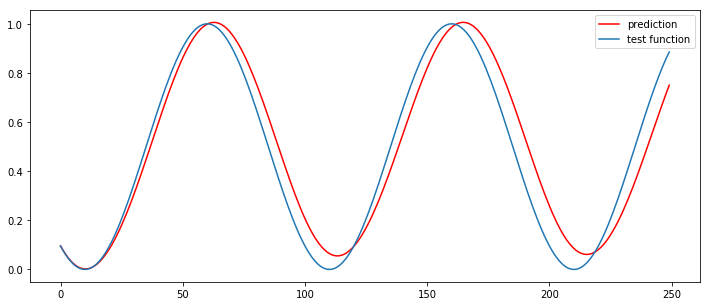

In [6]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

### 상태유지 순환신경망 모델

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 41s 53ms/step - loss: 0.0314 - val_loss: 0.0018
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 40s 53ms/step - loss: 0.0074 - val_loss: 6.1513e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 39s 51ms/step - loss: 0.0054 - val_loss: 0.0017
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 39s 51ms/step - loss: 0.0044 - val_loss: 2.7995e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 39s 51ms/step - loss: 0.0043 - val_loss: 0.0016
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 39s 51ms/step - loss: 0.0049 - val_loss: 0.0039
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 39s 51ms/st

760/760 [==============================] - 38s 50ms/step - loss: 0.0021 - val_loss: 3.7515e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0019 - val_loss: 4.1306e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0017 - val_loss: 3.9511e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0018 - val_loss: 3.4960e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0019 - val_loss: 8.0960e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0019 - val_loss: 4.9187e-06
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0023 - val_loss: 4.2867e-04

760/760 [==============================] - 38s 50ms/step - loss: 0.0020 - val_loss: 9.4457e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 39s 51ms/step - loss: 0.0019 - val_loss: 5.7835e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0022 - val_loss: 4.7694e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0020 - val_loss: 1.2338e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 39s 51ms/step - loss: 0.0019 - val_loss: 4.5962e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0019 - val_loss: 6.8361e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0021 - val_loss: 1.2228e-04

760/760 [==============================] - 38s 50ms/step - loss: 0.0020 - val_loss: 5.0517e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0018 - val_loss: 1.5503e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0020 - val_loss: 1.7586e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0020 - val_loss: 2.2247e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0019 - val_loss: 5.8161e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0021 - val_loss: 2.6917e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0019 - val_loss: 2.3044e-04

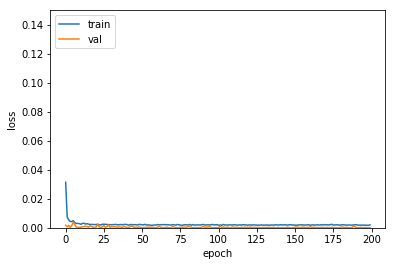

Train Score:  0.00012151551431833073
Validataion Score:  0.00011944879710005118
Test Score:  0.00011944879710005118


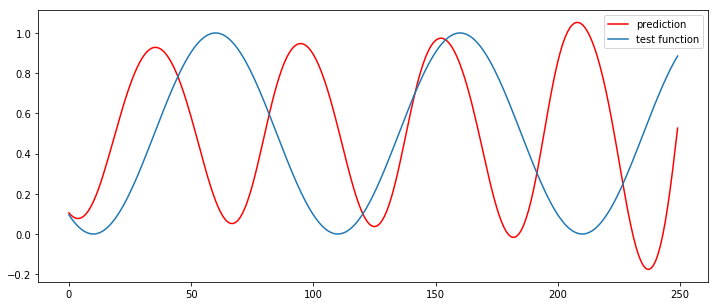

In [7]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()

# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()


### 상태유지 스택 순환신경망 모델

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 116s 152ms/step - loss: 0.0774 - val_loss: 0.0614
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 115s 151ms/step - loss: 0.0551 - val_loss: 0.0315
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0293 - val_loss: 0.0096
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.1293 - val_loss: 0.0514
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0136 - val_loss: 0.0031
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0058 - val_loss: 0.0049
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 15

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0034 - val_loss: 8.5048e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0033 - val_loss: 0.0022
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0071 - val_loss: 0.1738
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 115s 151ms/step - loss: 0.1395 - val_loss: 0.1273
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.1318 - val_loss: 0.1273
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.1311 - val_loss: 0.1273
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0044 - val_loss: 0.0015
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 115s 151ms/step - loss: 0.0033 - val_loss: 0.0043
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0045 - val_loss: 0.0228
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0081 - val_loss: 0.0026
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0091 - val_loss: 0.0017
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0055 - val_loss: 0.0027
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 15

760/760 [==============================] - 114s 150ms/step - loss: 0.0030 - val_loss: 8.1771e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0032 - val_loss: 0.0027
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0039 - val_loss: 8.7006e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0029 - val_loss: 0.0021
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 115s 151ms/step - loss: 0.0026 - val_loss: 0.0012
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0029 - val_loss: 0.0036
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 114s 150ms/step - loss: 0.0038 - val_loss: 0.0013
Train

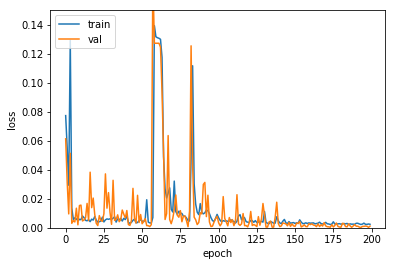

Train Score:  0.0011457001738626323
Validataion Score:  0.0011358878138774662
Test Score:  0.0011358878138774662


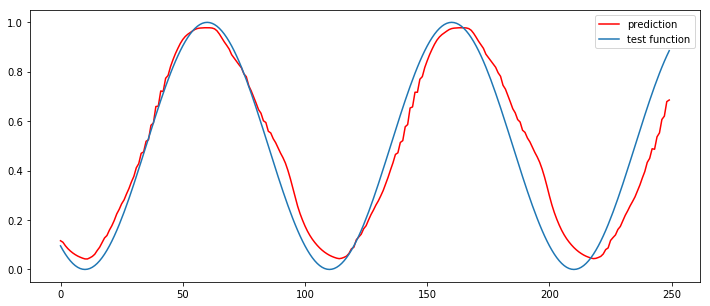

In [8]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()

# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()